In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
class ScratchLogisticRegression():
    
    def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamda = 1/0.01
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _check_for_bais(self,X):
        if self.bias == True:
            x1 = np.ones(X.shape[0])
        else:
            x1 = np.zeros(X.shape[0])
        
        return np.concatenate([x1.reshape(-1,1),X],axis=1)
        
        
    def _sigmoid_function(self,X):
        linear_model = np.dot(X,self.theta)
        
        return 1/(1+np.exp(-linear_model))
    
    def _gradient_descent(self, X, error):
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
    def _loss_function(self, y, y_pred):
        return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        X = self._check_for_bais(X)
        
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            y_pred = self._sigmoid_function(X)
            error = y_pred - y            
            self.loss[i] = self._loss_function(y,y_pred)
            
            if (type(X_val) != bool):
                val_X = self._check_for_bais(X_val)
                val_ypred = self._sigmoid_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_ypred)
            
            self._gradient_descent(X, error)
            
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
            
        np.save('theta', self.theta)            

    def predict(self, X):
        X = self._check_for_bais(X)
        y_pred = self._sigmoid_function(X)
        
        return np.where(y_pred<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        X = self._check_for_bais(X)
        return self._sigmoid_function(X)

# Hypothetical function

- The assumed function for logistic regression is the assumed function for linear regression passed through the Sigmoid function

**This is implemented in the above class**

In [3]:
def _sigmoid_function(self,X):
    linear_model = np.dot(X,self.theta)

    return 1/(1+np.exp(-linear_model))

# Steepest descent

In [4]:
def _gradient_descent(self, X, error):
    self.tmp = np.append(0,np.ones(X.shape[1]-1))
    self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)

# Estimated

- Please implement the estimation mechanism. Add to the predict method and predict_proba method included in the template of ScratchLogisticRegression class.

## Creating a datasets

In [5]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

**spliting the datasets into training and testing subsets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**creating an instance of the model**

In [7]:
l_regression = ScratchLogisticRegression(num_iter=1000, lr=0.001, verbose=False)
l_regression.fit(X_train,y_train,X_test,y_test)
y_pred_label = l_regression.predict(X_test)
y_pred_proba = l_regression.predict_proba(X_test)

print("Labels ",y_pred_label)
print("Probability:",y_pred_proba)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_32748\2130757120.py:31: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_32748\2130757120.py:31: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)
C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_32748\2130757120.py:24: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-linear_model))


Labels  [0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 0 0 0]
Probability: [9.05761552e-060 1.00000000e+000 1.00000000e+000 1.49678426e-016
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 9.93378469e-001 9.99996641e-001
 1.00000000e+000 1.73753824e-005 3.51309627e-001 6.97658244e-110
 1.00000000e+000 1.51313710e-218 1.28406256e-002 2.40697353e-286
 4.74165303e-139 3.40564379e-029 1.00000000e+000 1.00000000e+000
 2.17206058e-012 9.16507124e-002 1.00000000e+000 1.00000000e+000
 1.00000000e+000 0.00000000e+000 1.00000000e+000 1.18878026e-271
 9.99983546e-001 3.96563445e-105 1.00000000e+000 4.16275811e-112
 9.03637926e-006 3.88564623e-143 1.00000000e+000 7.81336935e-093
 2.34736206e-031 1.00000000e+000 4.47243536e-102 1.00000000e+000
 1.79692157e-005 3.03777611e-24

# Objective function

- Implementation of the Objective function (loss function)

In [1]:
def _loss_function(self, y, y_pred):
    return np.mean(-y*np.log(y_pred) -(1-y)*np.log(1-y_pred))+0.5*self.lamda*np.mean(self.theta[1:]**2)

# Learning and estimation

- Learn and estimate the scratch implementation for the binary classification of virgicolor and virginica in the iris data set provided in the Introduction to Scratch Machine Learning Sprint.
- Compare this with the scikit-learn implementation and see if it works correctly
- Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
X_1 = iris.loc[iris[4]!=0,2:3].values
y_1 = iris.loc[iris[4]!=0,4].values

In [18]:
# spliting the datasets into training and testing subsets
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1= scaler.transform(X_test_1)

# creating an instance of our model
l_regression_1 = ScratchLogisticRegression(num_iter=500, lr=0.01, lam=0.1, bias=True, verbose=False)
l_regression_1.fit(X_train_1,y_train_1,X_test_1,y_test_1)
y_pred_label_1 = l_regression_1.predict(X_test_1)
y_pred_proba_1 = l_regression_1.predict_proba(X_test_1)

print("y pred:",y_pred_label_1)

y pred: [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [45]:
accuracy = accuracy_score(y_test_1, y_pred_label_1)
precision = precision_score(y_test_1, y_pred_label_1, average='weighted')
recall = recall_score(y_test_1, y_pred_label_1, average='weighted')

print("-------------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

-------------
accuracy 0.45
precision 0.23684210526315788
recall 0.45


C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Plot of learning curve

- Looking at the learning curve to see if the losses are falling properly.

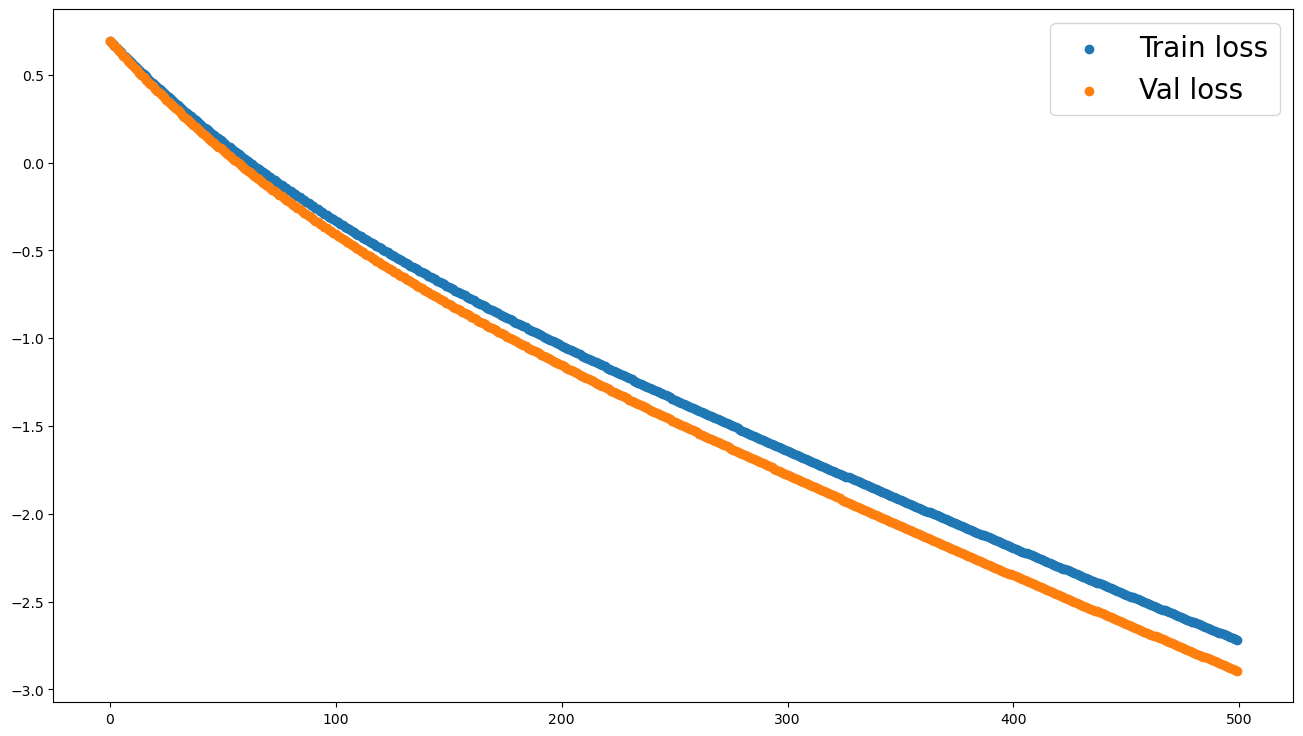

In [48]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regression_1.loss)),l_regression_1.loss,label='Train loss')
plt.scatter(range(len(l_regression_1.val_loss)),l_regression_1.val_loss,label='Val loss')
plt.legend();

#  Visualization of decision area

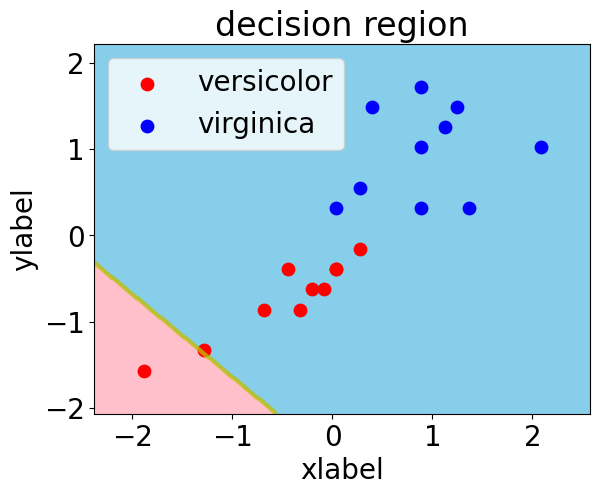

In [49]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_test_1, y_test_1, l_regression_1)

# # (Advance assignment) Saving weights

In [57]:
import pickle # importing pickle to save data
filename = "l_regression"
pickle.dumps(l_regression_1)

b'\x80\x04\x95\xaf \x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x19ScratchLogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x08num_iter\x94M\xf4\x01\x8c\x02lr\x94G?\x84z\xe1G\xae\x14{\x8c\x04bias\x94\x88\x8c\x07verbose\x94\x89\x8c\x03lam\x94G?\xb9\x99\x99\x99\x99\x99\x9a\x8c\x05theta\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x03K\x01\x86\x94h\x0e\x8c\x05dtype\x94\x93\x94\x8c\x02f8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C\x18\xd9\xfa\x16]\xdb\xeb\x0c@\xf9)\xbc\xc8\xd6X\xf5?\xfa\xeb\x94q\x86E\xf6?\x94t\x94b\x8c\x04loss\x94h\rh\x10K\x00\x85\x94h\x12\x87\x94R\x94(K\x01M\xf4\x01\x85\x94h\x1a\x89B\xa0\x0f\x00\x00,O\x84+C.\xe6?gjCk\xb0\xc1\xe5?Xq=/\xc5U\xe5?d>\xbeU\x80\xea\xe4?\x80\x93\x1e\xb8\xe0\x7f\xe4?\x94\x19\t+\xe5\x15\xe4?\xe3\xdc\xbe~\x8c\xac\xe3?f+[\x7f\xd5C\xe3?}\xbb\x16\xf5\xbe\xdb\xe2?P\x02\x8a\xa4Gt\xe2?\xc8\

In [58]:
from tempfile import TemporaryFile

outfile = TemporaryFile()
np.savez(outfile, l_regression)

NameError: name 'l_regression' is not defined